#FloPy3
##Plotting Model Arrays and Results
This notebook demonstrates the simple array and results plotting capabilities of flopy.  It demonstrates these capabilities by loading and running an existing model, and then showing how the `.plot()` method can be used to make simple plots of the model data and model results.

In [1]:
%matplotlib inline
from IPython.display import Image
import sys
import os
import platform
import numpy as np
import matplotlib.pyplot as plt

import flopy

#Set name of MODFLOW exe
#  assumes executable is in users path statement
version = 'mf2005'
exe_name = 'mf2005'
if platform.system() == 'Windows':
    exe_name = 'mf2005.exe'
mfexe = exe_name

#Set the paths
loadpth = os.path.join('..', 'data', 'secp')
modelpth = os.path.join('data')

#make sure modelpth directory exists
if not os.path.exists(modelpth):
    os.makedirs(modelpth)
    
files = ['secp.hds']

###Load and Run an Existing Model
A model called the "Southeast Coastal Plain Model" is located in the loadpth folder.  In the following code block, we load that model, then change into a new workspace (modelpth) where we recreate and run the model.  For this to work properly, the MODFLOW-2005 executable (mf2005) must be in the path.  We verify that it worked correctly by checking for the presence of secp.hds.

In [2]:
ml = flopy.modflow.Modflow.load('secp.nam', model_ws=loadpth, 
                                exe_name=exe_name, version=version)
ml.change_model_ws(new_pth=modelpth)
ml.write_input()
success, buff = ml.run_model(silent=True)

if not success:
    print ('Something bad happened.')

#--confirm that the model files have been created
for f in files:
    if os.path.isfile(os.path.join(modelpth, f)):
        msg = 'Output file located: {}'.format(f)
        print (msg)
    else:
        errmsg = 'Error. Output file cannot be found: {}'.format(f)
        print (errmsg)

temporalReference warning: not dealing with steady state yet

changing model workspace...
   data
Output file located: secp.hds


###Plotting Model Data
Once a model object is created MODFLOW package data can be plotted using the `.plot()` method.

Two-dimensional data (for example the model top) can be plotted by calling the `.plot()` method for each data array.

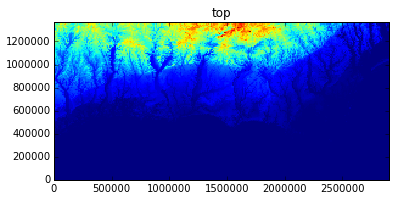

In [3]:
ml.dis.top.plot()

As you can see, the `.plot()` methods returns a `matplotlib.pyplot` axis object, which can be used to add additional data to the figure. Below we will add black contours to the axis returned in the first line.

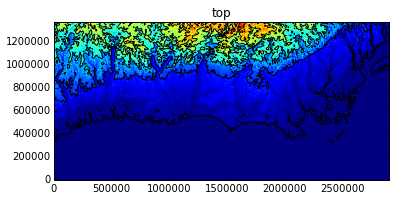

In [4]:
ax = ml.dis.top.plot()
ml.dis.top.plot(axes=ax, contour=True, pcolor=False)

You will notice that we passed several keywords in the second line. There are a number of keywords that can be passed to the `.plot()` and `.plot_data()` method to control plotting. Available keywords are:

1. `axes` - if you already have plot axes you can pass them to the method
2. `pcolor` - turns pcolor on if `pcolor=True` or off if `pcolor=False`, default is `pcolor=True`
3. `colorbar` - turns on colorbar if `colorbar=True` or off if `colorbar=False`, default is `colorbar=False` and is only used if `pcolor=True`
4. `contour` - turns on contours if `contour=True` or off if `contour=False`, default is `contour=False`
5. `clabel` - turns on contour labels if `clabel=True` or off if `clabel=False`, default is `clabel=False` and is only used if `contour=True`
6. `grid` - turns on model grid if `grid=True` or off if `grid=False`, default is `grid=False`
7. `masked_values` - list with unique values to be excluded from the plot (for example, HNOFLO)
8. `mflay` - for three-dimensional data (for example layer bottoms or simulated heads) `mflay` can be used to plot data for a single layer - note `mflay` is zero-based
9. `kper` - for transient two-dimensional data (for example recharge package data) `kper` can be used to plot data for a single stress period - note `kper` is zero-based
10. `filename_base` - a base file name that will be used to automatically generate file names for two-dimensional, three-dimensional, and transient two-dimensional data, default is `filename_base=None`
11. `file_extension` - valid `matplotlib` file extension, default is `png` and is only used if `filename_base` is specified

The previous code block is recreated in a single line using keywords in the code block below.

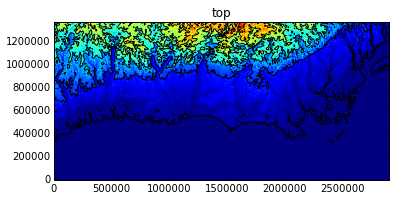

In [5]:
ml.dis.top.plot(contour=True)

We can save the same image to a file.

In [6]:
fname = os.path.join(modelpth, 'secp')
ml.dis.top.plot(contour=True, filename_base=fname)

    created...secp_top.png


The image file that was just created is shown below

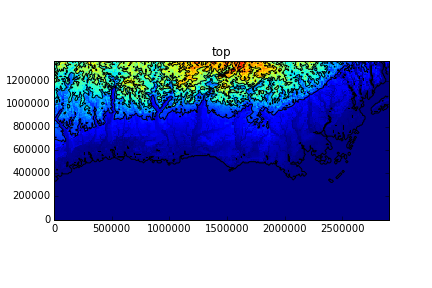

In [7]:
fname = os.path.join(modelpth, 'secp_top.png')
Image(filename=fname) 

###Plotting three-dimensional data

Three-dimensional data can be plotted using the `.plot()` method. User's do not actually need to know that the data are two- or three-dimensional. The `.plot()` method is attached to the two- and three-dimensional data objects so it knows how to process the model data. Examples of three-dimensional data are horizontal hydraulic conductivity (`hk`), layer bottoms (`botm`), specific yield (`sy`), *etc.*

Here we plot the horizontal hydraulic conductivity for each layer. We are also masking areas where the horizontal hydraulic conductivity is zero and adding a color bar.

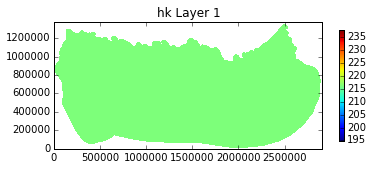

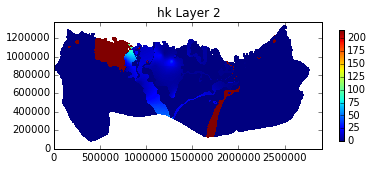

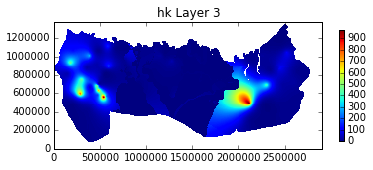

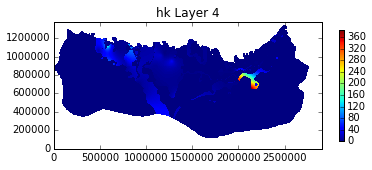

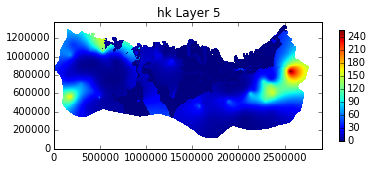

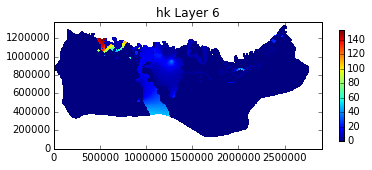

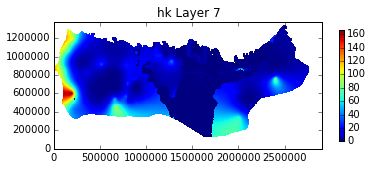

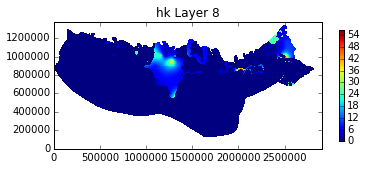

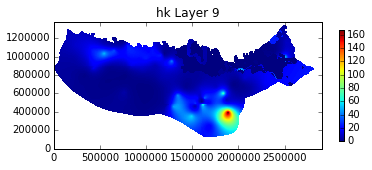

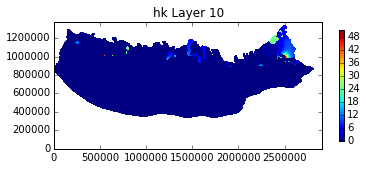

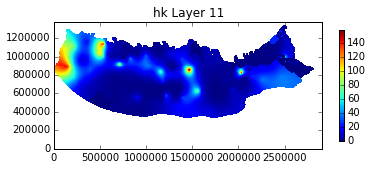

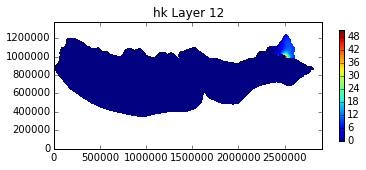

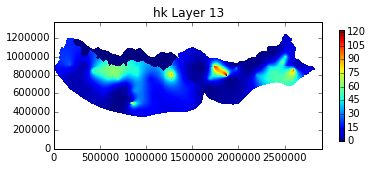

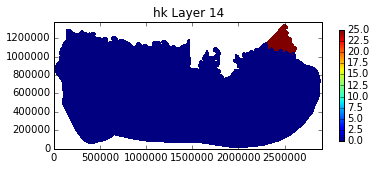

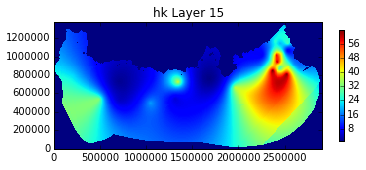

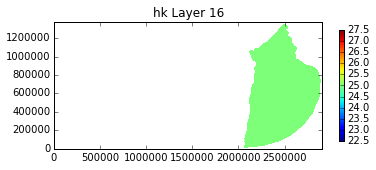

In [8]:
ml.lpf.hk.plot(masked_values=[0.], colorbar=True)

In addition to the plots of horizontal hydraulic conductivity you can see that the `.plot()` method returned a list containing 16 axis objects (one for each layer).

####Plotting data for a single layer

If the `mflay=` keyword is provided to the `plot.()` method then data for an individual layer is plotted. Remember `mflay` is zero-based.

Here we plot the horizontal hydraulic conductivity for layer 11 (`mflay=10`).

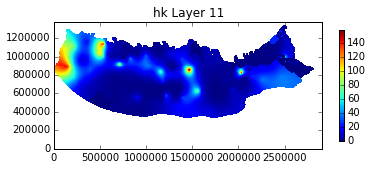

In [9]:
ml.lpf.hk.plot(mflay=10, masked_values=[0.], colorbar=True)

###Plotting transient two-dimensional data

Transient two-dimensional data can be plotted using the `.plot()` method. User's do not actually need to know that the data are two- or three-dimensional. The `.plot()` method is attached to the two- and three-dimensional, and transient two-dimensional data objects so it knows how to process the model data. Examples of transient two-dimensional data are recharge rates (`rch.rech`) and evapotranspiration rates (`evt.evtr`).

Here we plot recharge rates for all six stress periods in the model. We are also masking areas where the recharge rate is zero and adding a color bar.

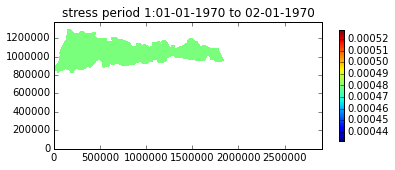

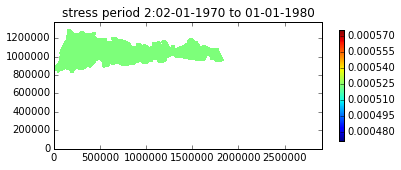

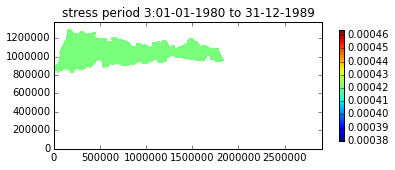

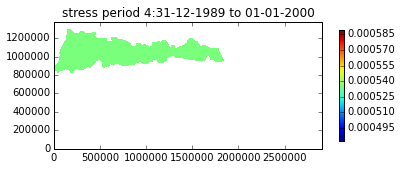

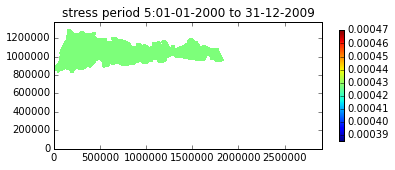

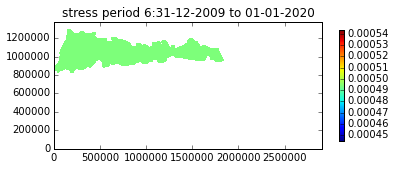

In [10]:
ml.rch.rech.plot(masked_values=[0.], colorbar=True)

In addition to the plots of recharge rates you can see that the `.plot()` method returned a list containing 6 axis objects (one for each stress period).

####Plotting data for a single stress period

If the `kper=` keyword is provided to the `plot.()` method then data for an individual stress period is plotted. Remember `kper` is zero-based.

Here we plot the recharge rate for stress period 6 (`kper=5`).

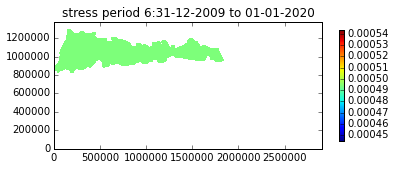

In [11]:
ml.rch.rech.plot(kper=5, masked_values=[0.], colorbar=True)

We can also save the image to a file by provided the `filename_base` keyword with an appropriate base file name.

In [12]:
fr = os.path.join(modelpth, 'secp_rch')
ml.rch.rech.plot(kper=5, masked_values=[0.], colorbar=True,
                 filename_base=fr)

    created...secp_rch_00006.png


[None]

If the `kper` keyword is not provided images are saved for each stress period in the model.

The image file that was just created of recharge rates for stress period 6 is is shown below.

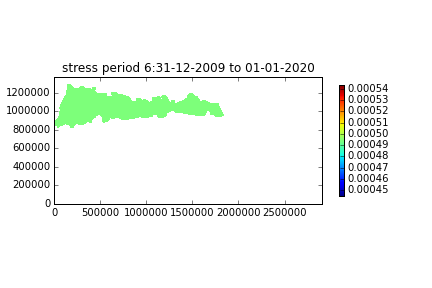

In [13]:
fname = os.path.join(modelpth, 'secp_rch_00006.png')
Image(filename=fname) 

###Plotting simulated model results

Simulated model results can be plotted using the `.plot()` method.

First we create an instance of the `HeadFile` class with the simulated head file (secp.hds) and extract the simulation times available in the binary head file using the `.get_times()` method. Here we plot last simulated heads in the binary heads file (`totim=times[-1]`). We are also masking cells having the `HDRY` (-9999.0)  value and adding a color bar.

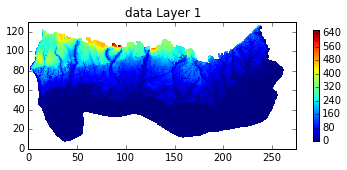

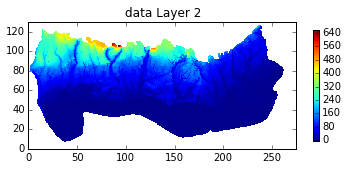

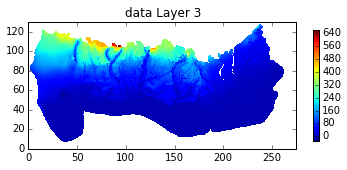

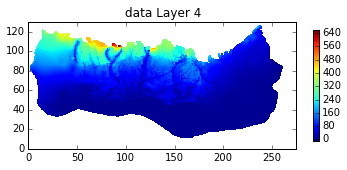

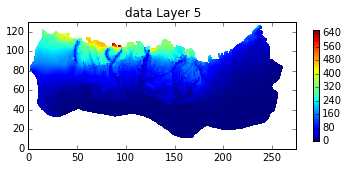

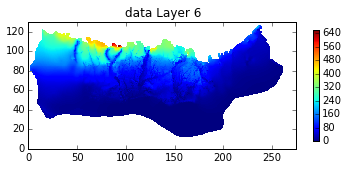

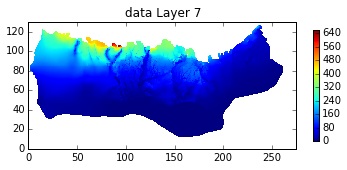

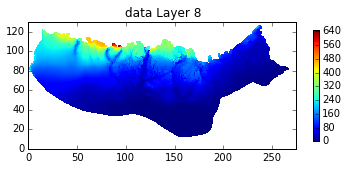

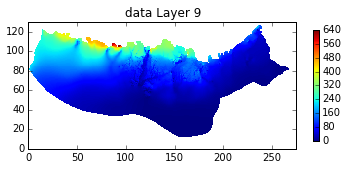

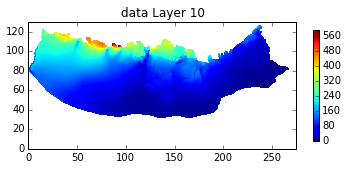

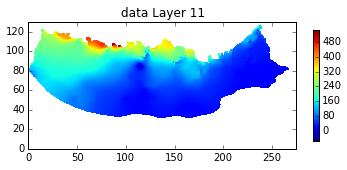

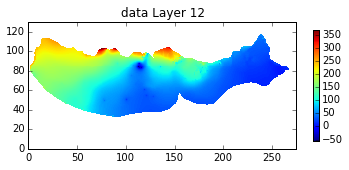

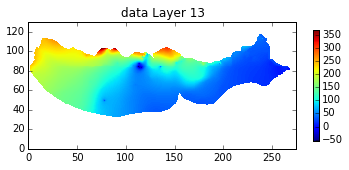

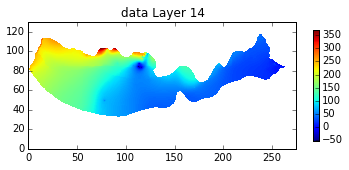

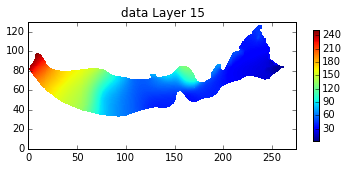

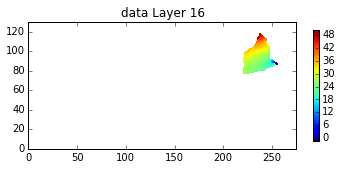

In [14]:
fname = os.path.join(modelpth, files[0])
hdobj = flopy.utils.HeadFile(fname)
times = hdobj.get_times()
head = hdobj.plot(totim=times[-1],
                  masked_values=[-9999.0],
                  colorbar=True)

####Plotting results for a single layer

If the `mflay=` keyword is provided to the `plot.()` method then results for an individual layer can be plotted. Remember `mflay` is zero-based.

Here we plot the results for layer 2 (`mflay=1`) for stress period 2 (`totim=times[1]`). We also add black contour lines.

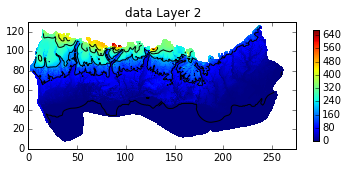

In [15]:
head = hdobj.plot(totim=times[1], mflay=1, 
                  masked_values=[-9999.0],
                  colorbar=True,
                  contour=True, colors='black')

We can also save the plots of the head results for every layer (or a single layer) to a file by provided the `filename_base` keyword with an appropriate base file name.

In [16]:
fh = os.path.join(modelpth, 'secp_head')
head = hdobj.plot(totim=times[-1], 
                  masked_values=[-9999.0],
                  colorbar=True,
                  contour=True, colors='black',
                  filename_base=fh)

    created...secp_head_Layer1.png
    created...secp_head_Layer2.png
    created...secp_head_Layer3.png
    created...secp_head_Layer4.png
    created...secp_head_Layer5.png
    created...secp_head_Layer6.png
    created...secp_head_Layer7.png
    created...secp_head_Layer8.png
    created...secp_head_Layer9.png
    created...secp_head_Layer10.png
    created...secp_head_Layer11.png
    created...secp_head_Layer12.png
    created...secp_head_Layer13.png
    created...secp_head_Layer14.png
    created...secp_head_Layer15.png
    created...secp_head_Layer16.png


The image file that was just created of the simulated head for layer 2 for stress period 6 is is shown below.

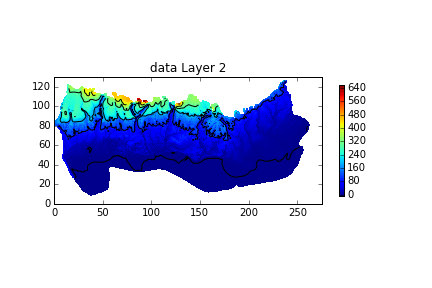

In [17]:
fname = os.path.join(modelpth, 'secp_head_Layer2.png')
Image(filename=fname) 

##Summary

This notebook demonstrates some of the simple plotting functionality available with flopy.  Although not described here, the plotting functionality tries to be general by passing keyword arguments passed to the `plot()` and `plot_data()` methods down into the `matplot.pyplot` routines that do the actual plotting.  For those looking to customize these plots, it may be necessary to search for the available keywords.  The `plot()` method return the `matplot.pyplot` axis objects that are created (or passed). These axes objects can be used to plot additional data (except when plots are saved as image files).

Hope this gets you started!